# End to End ML Project

### Steps for ML Project 
1. Import libraries
2. Data Cleaning
3. EDA
4. Data Preprocessing
5. Model Fitting
6. Model Evaluation 
7. Model Optimization
8. Model Interpretation
9. Model Deployment in Streamlit

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install shap --user

In [3]:
!pip install streamlit

In [4]:
!pip install imbalanced-learn

In [5]:
!pip install xgboost

### Import Libraries

In [6]:
# for data manipulation 
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")

# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix

# libraries for optimization and interpretation
#import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


<Figure size 1200x700 with 0 Axes>

In [7]:
# get the data 
data=pd.read_csv("data.csv")

In [8]:
# view the data 
data.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age Outcome  
0  33.6                     0.627   50     Yes  
1  26.6                     0.351   31      No  
2  23.3                     0.672   32     Yes  
3  28.1                     0.167   21      No  
4  43.1                     2.288   33     Yes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [10]:
#check for null
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# check for zero errors 
data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    3.845052    3.369578   0.000    1.00000   
Glucose                   768.0  120.894531   31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000   62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000    0.00000   
Insulin                   768.0   79.799479  115.244002   0.000    0.00000   
BMI                       768.0   31.992578    7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   

                               50%        75%     max  
Unnamed: 0                383.5000  575.25000  767.00  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [12]:
# check for duplicates 
data.duplicated().sum()

0

**Observations**
1. The data has 768 rows and 10 columns 
2. Column Unnamed: 0 is a reducndnat column and will be dropped
3. Columns Pregnancies, Glucose, BloodPressure, SkinThickness , Insulin and BMI have 0 errors and has to be impyuted with column medians 
4. There are no missing values
5. Only outcome is categorical and it has to encoded before modelling
6. There are no duplicates



In [13]:
# drop the Unnamed column 
data.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
# impute zero errors
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [15]:
# check descriptives again
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  121.656250   30.438286  44.000  99.75000   
BloodPressure             768.0   72.386719   12.096642  24.000  64.00000   
SkinThickness             768.0   27.334635    9.229014   7.000  23.00000   
Insulin                   768.0   94.652344  105.547598  14.000  30.50000   
BMI                       768.0   32.450911    6.875366  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    31.2500  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

Data looks good for EDA 

### Exploratory Data Analysis(EDA)
- Univariate Analysis
         -- numerical - histplots and boxplots 
         -- categorical
- Bivariate Analysis 
         -- categorical vs numerical
         -- numerical vs numerical 
- Multivariate 
         -- pairplots 
- Correlations 
         -- heatmaps

In [16]:
# Lets do Univariate Histograms 
def histograms(data):
    data.hist()
    plt.tight_layout()
    plt.show()

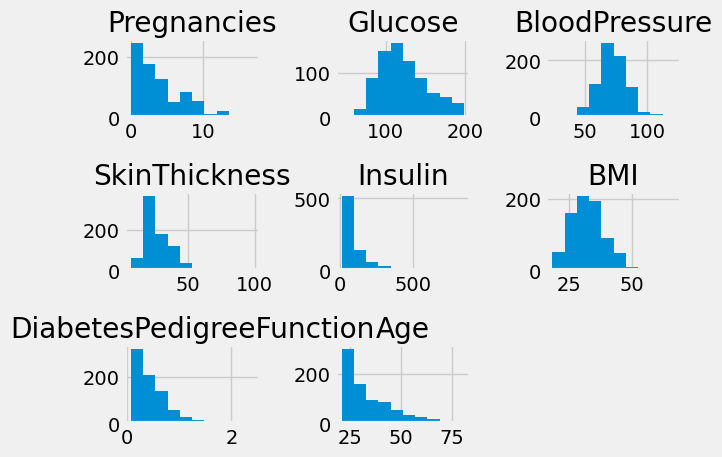

In [17]:
histograms(data)

In [18]:
# Lets do side by side histplot adn boxplots 
def histplot_boxplot(data, feature, figsize=(12,7), bins=None):
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25, 0.75)},
    figsize=figsize )
    
    sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=ax_box)
    sns.histplot(data=data, x=feature,pallete="winter", bins=bins, ax=ax_hist) if bins else sns.histplot(data=data,
                                                                     x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), linestyle="--", color="green")
    ax_hist.axvline(data[feature].median(), linestyle="-", color="black")
    plt.show()

Pregnancies


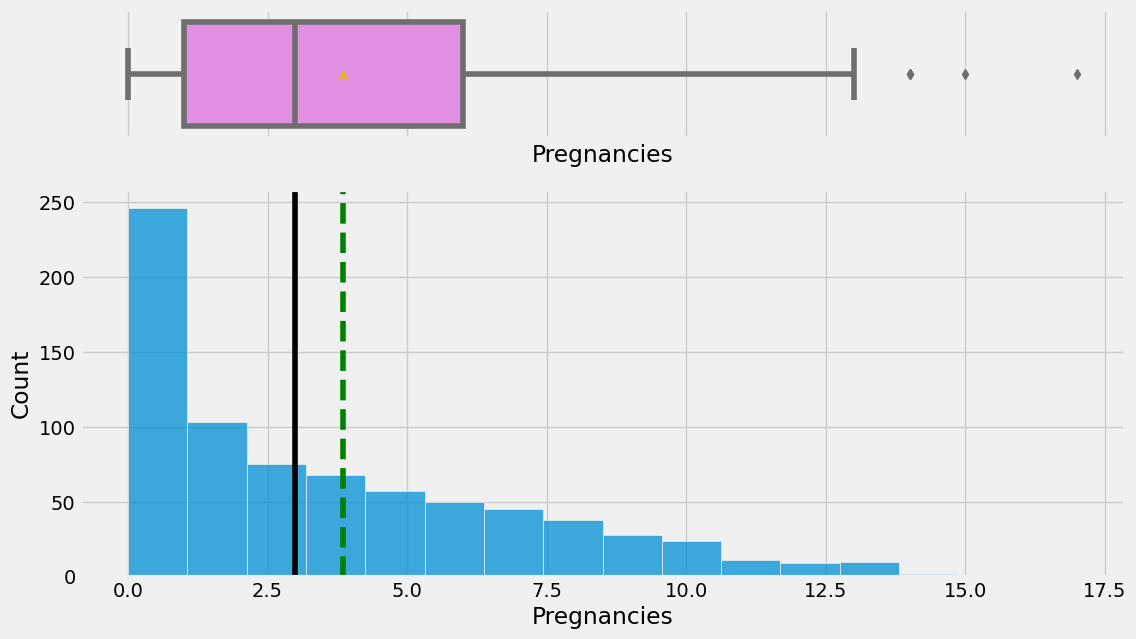

Glucose


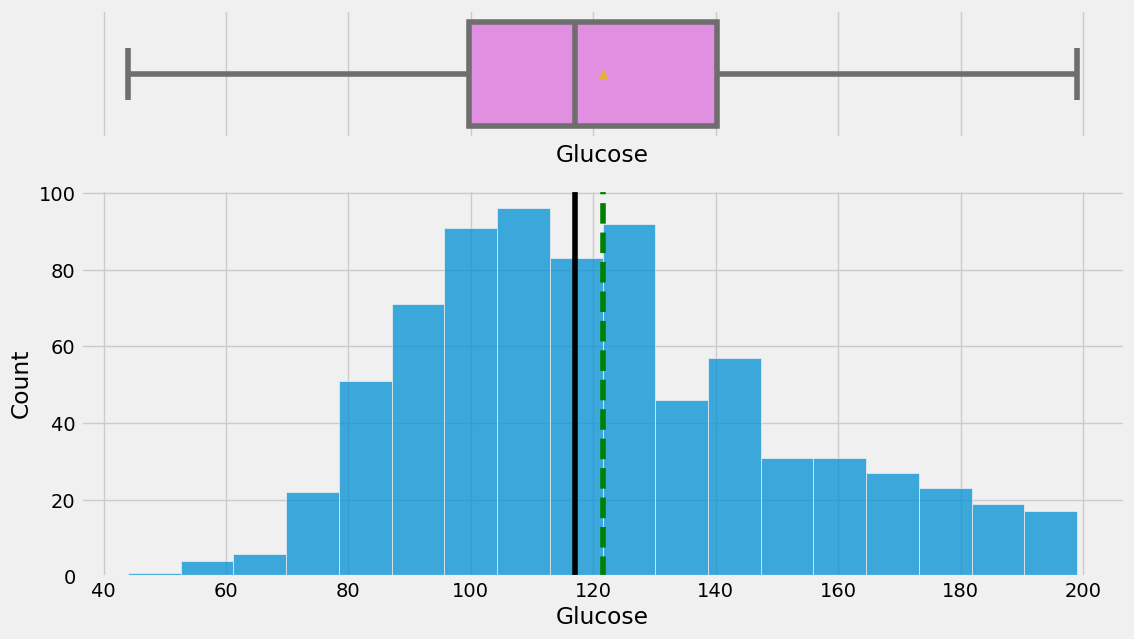

BloodPressure


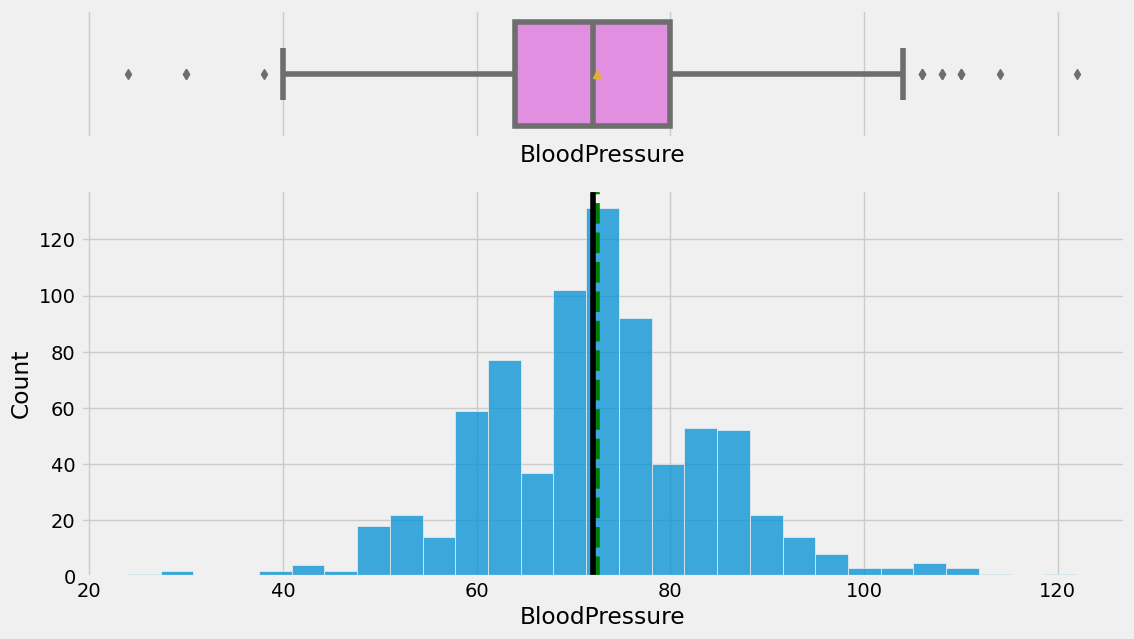

SkinThickness


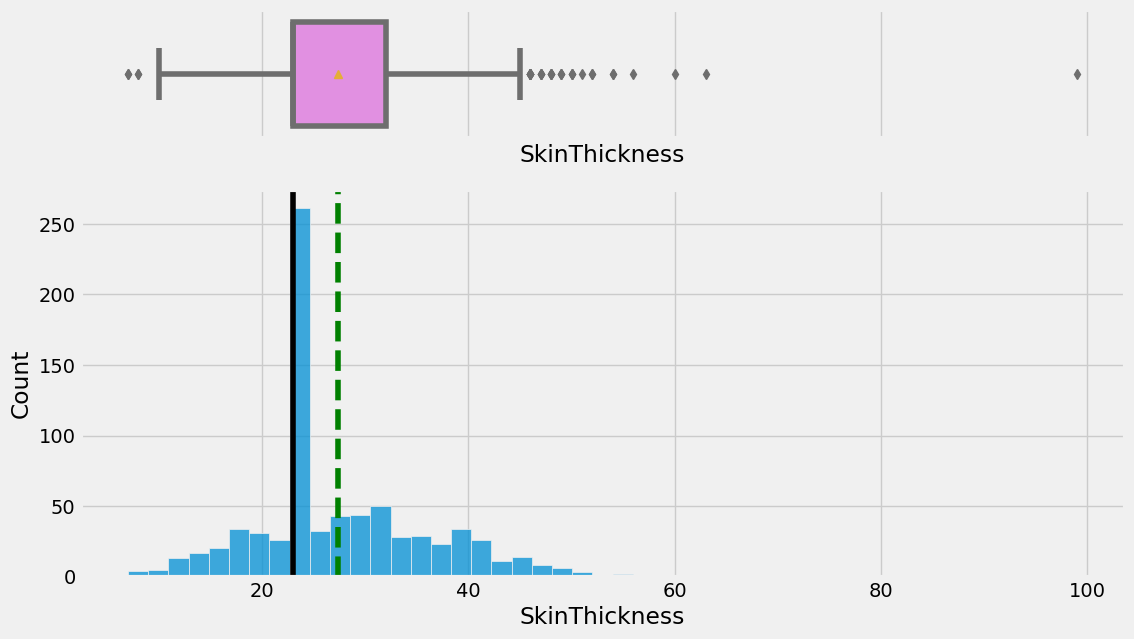

Insulin


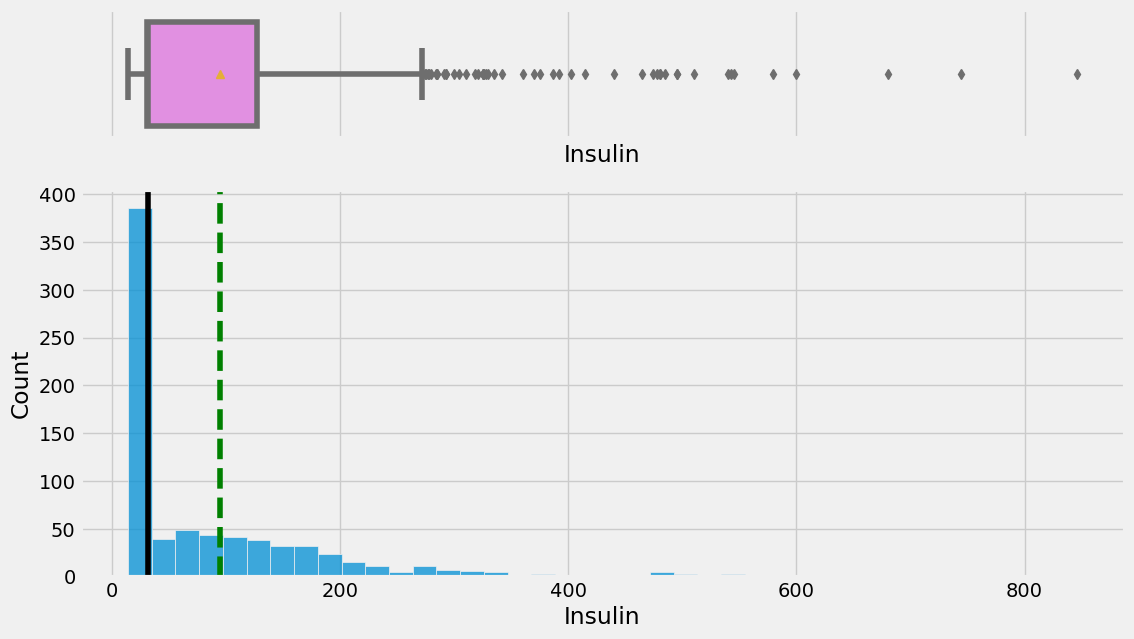

BMI


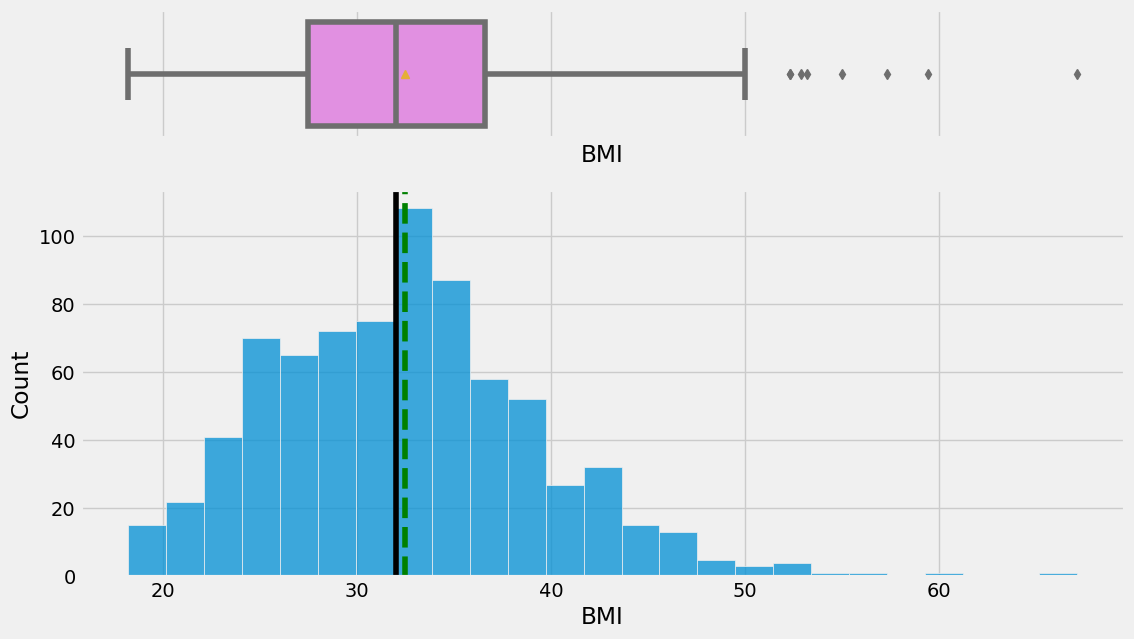

DiabetesPedigreeFunction


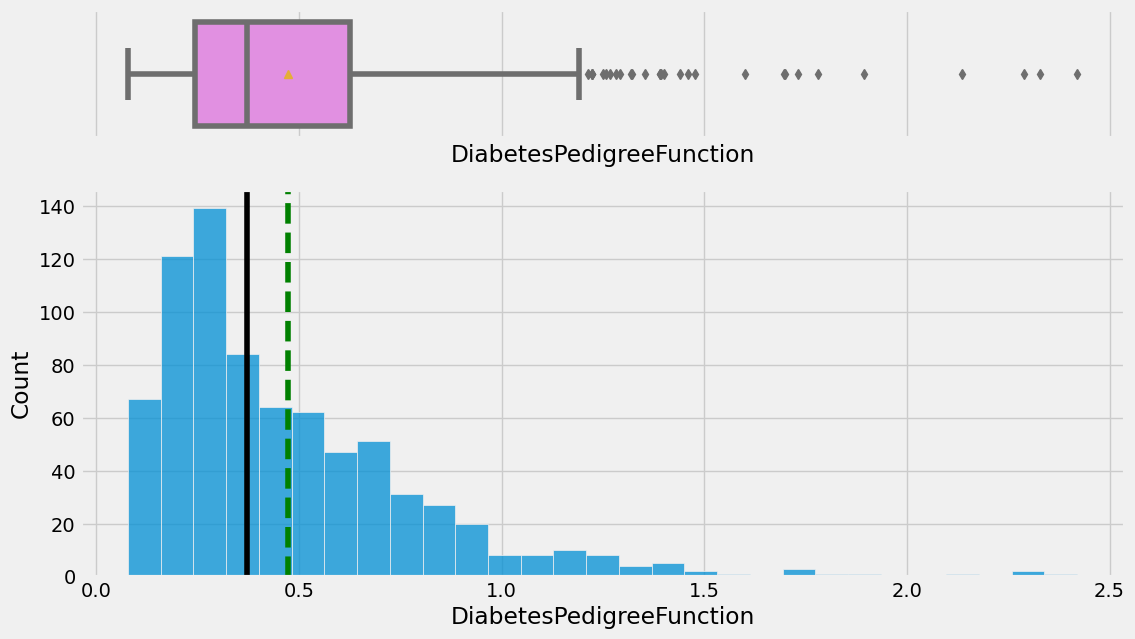

Age


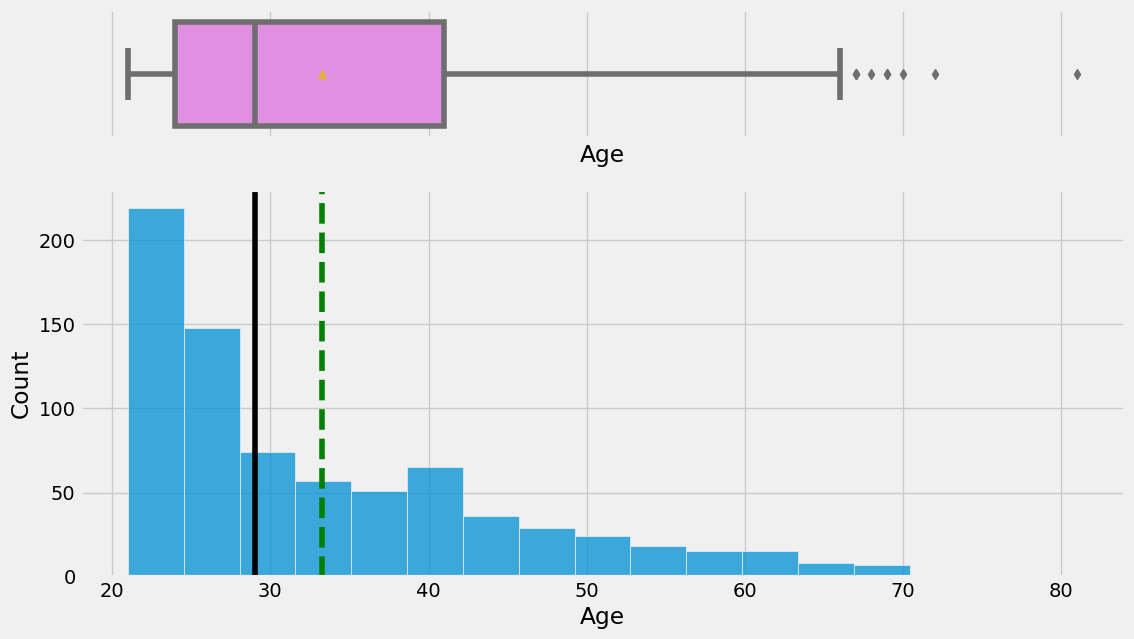

In [19]:
for col in data.select_dtypes(exclude="O").columns:
    print(col)
    histplot_boxplot(data=data, feature=col)
    plt.show()
    
    

Observations
1. Outliers- Preganancies, SkinThickness, Insulin , Diabetes Pedigree Function have lots of outliers we may need to cap the outer limit 
2. Skew- SkinThickness, Insulin , Diabetes Pedigree Function are highly right skewed and needs to be transformed using log or square root

In [20]:
# univariate Countplot
def countplot(data, feature):
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color="green")
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(data)), (x.mean(), y), ha="center", va="bottom")
    plt.show()

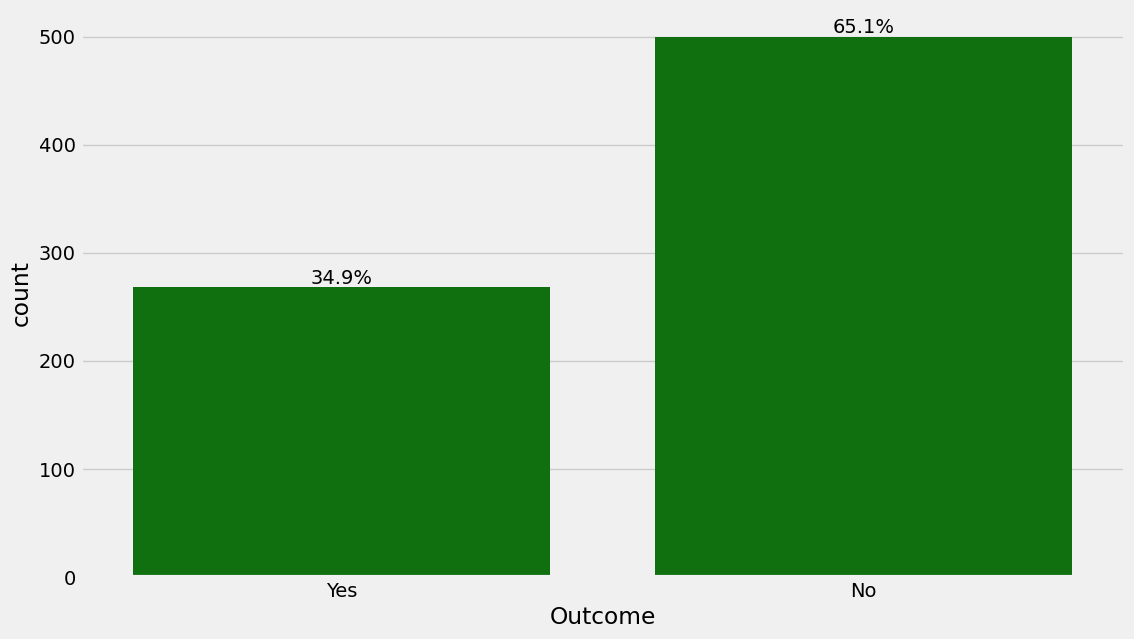

In [21]:
countplot(data=data,feature="Outcome")

The Outcome variable is not balanced. We would need for solve for data imbaalnce before modelling

In [22]:
# Bivariate -categorical vs numerical
def bivariate_barplot(data, feature1, feature2):
    data.groupby(feature1)[feature2].mean().plot(kind="bar", color="orange")
    plt.ylabel(col)
    plt.show()

Outcome vs  Pregnancies


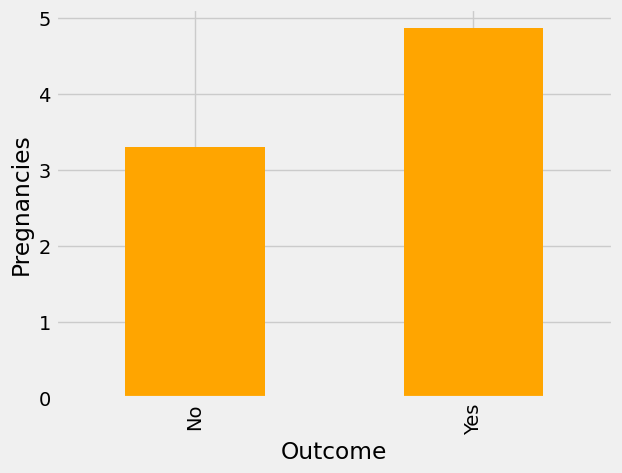

**************************************
Outcome vs  Glucose


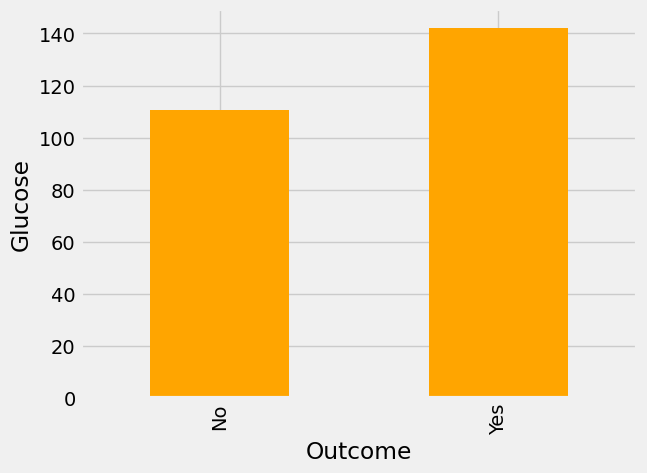

**************************************
Outcome vs  BloodPressure


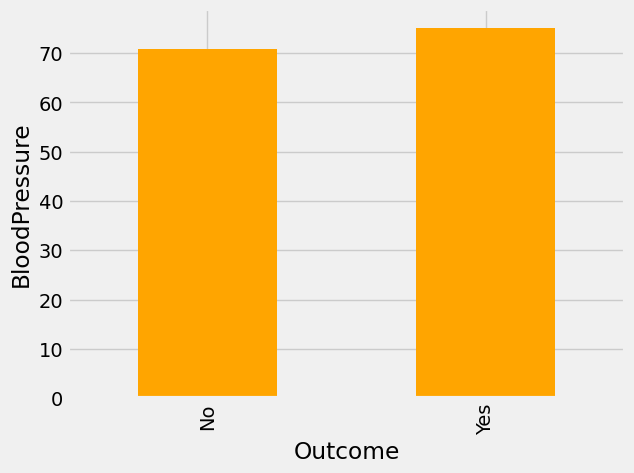

**************************************
Outcome vs  SkinThickness


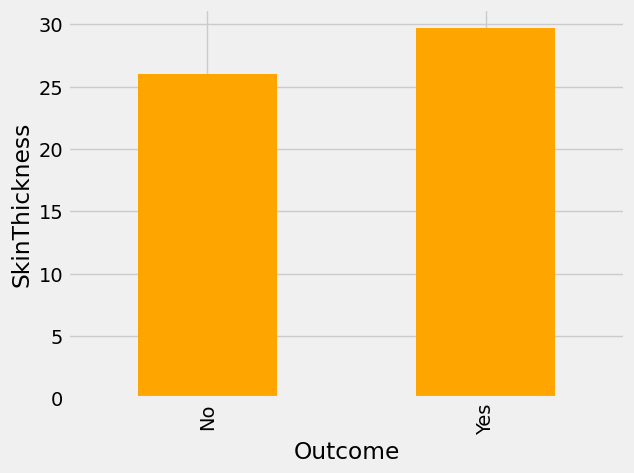

**************************************
Outcome vs  Insulin


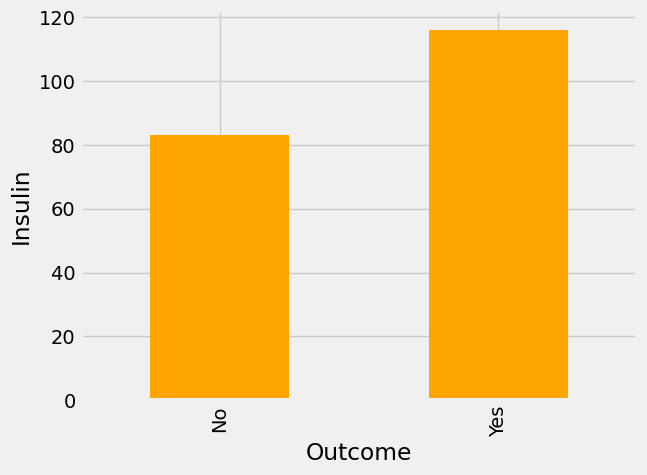

**************************************
Outcome vs  BMI


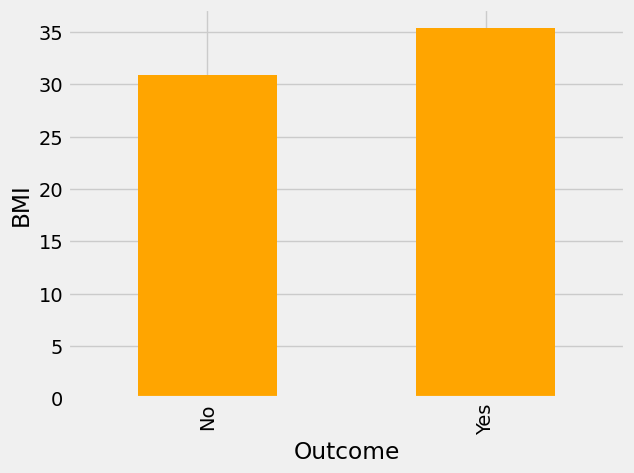

**************************************
Outcome vs  DiabetesPedigreeFunction


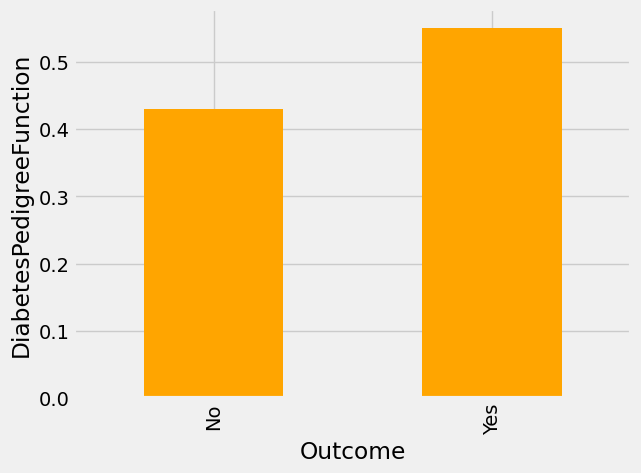

**************************************
Outcome vs  Age


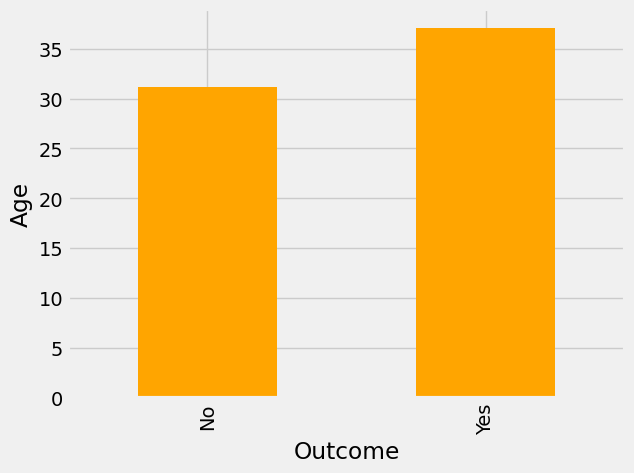

**************************************


In [23]:
for col in data.select_dtypes(exclude="O").columns:
    print("Outcome vs ", col)
    bivariate_barplot(data=data, feature1="Outcome",feature2= col)
    print("**************************************")

Those with higher Pregnancies, Glucose, Insulin, BMI and Age are more likely to be diabetic

In [24]:
# numericall vs numerical
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Outcome")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2))
    plt.show()

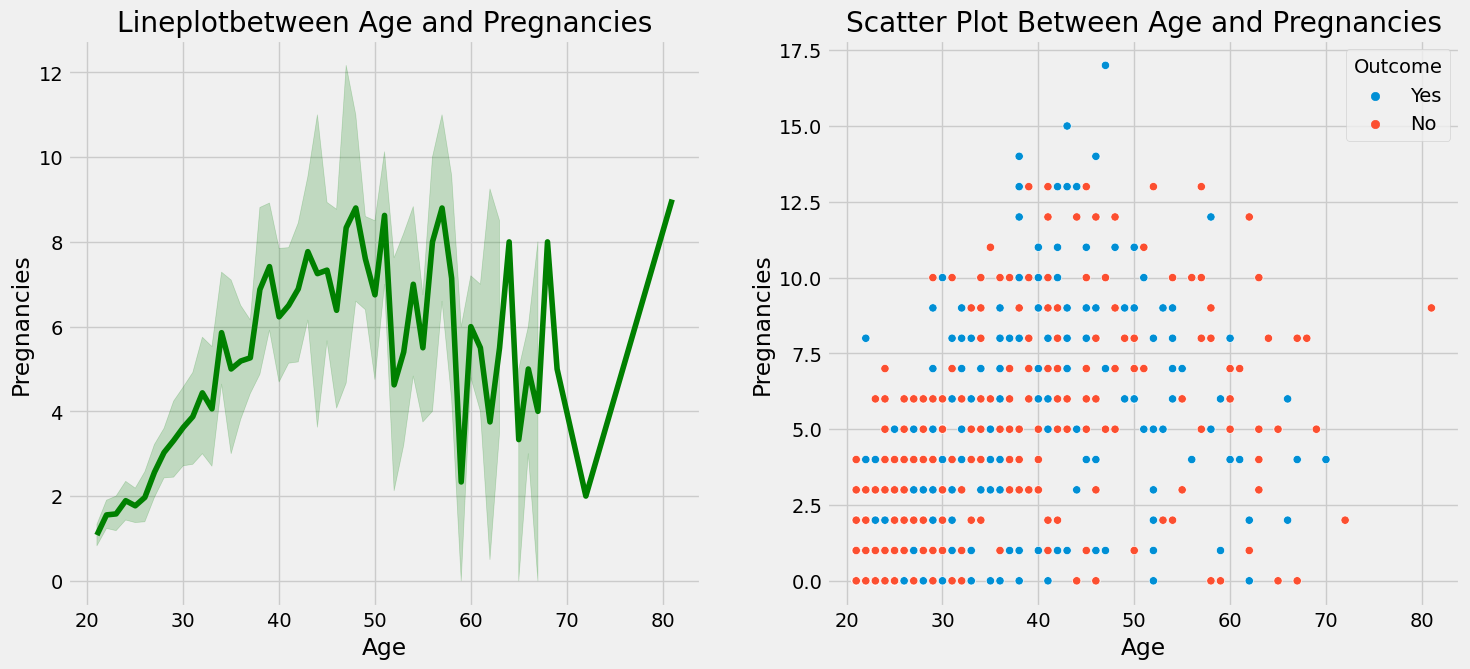

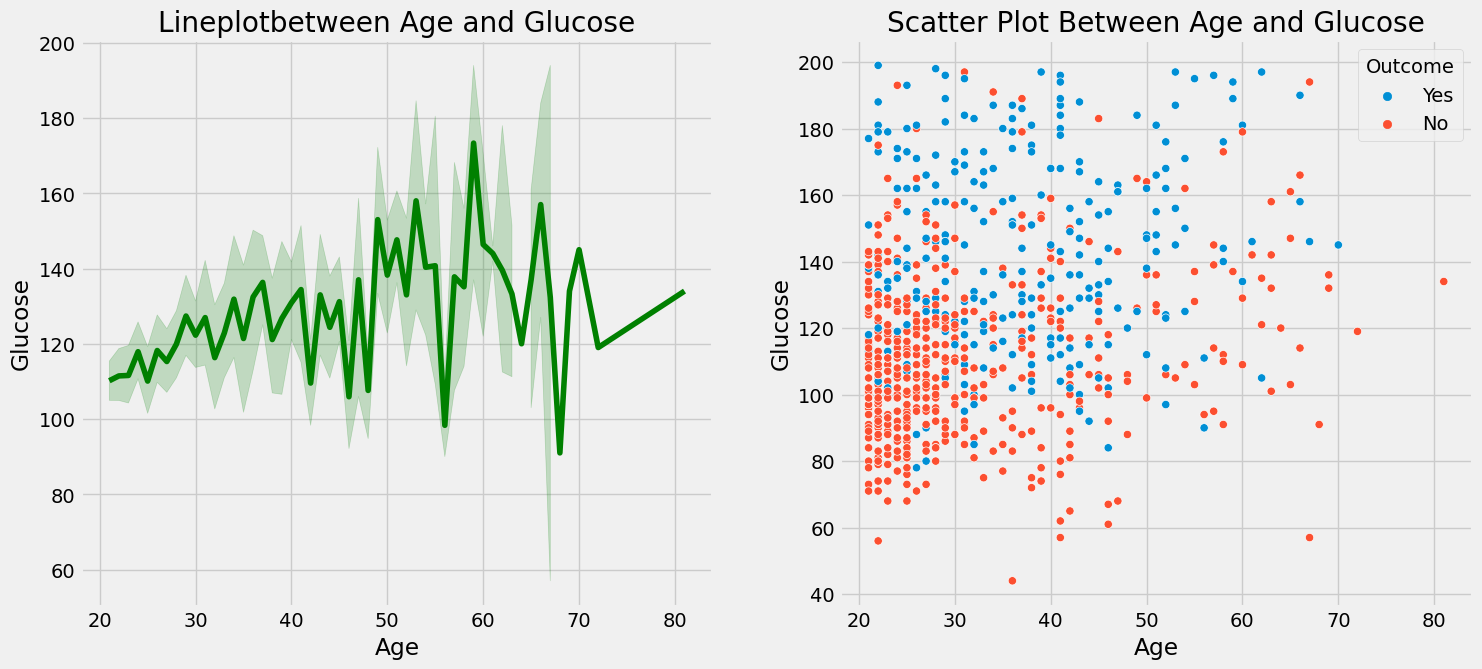

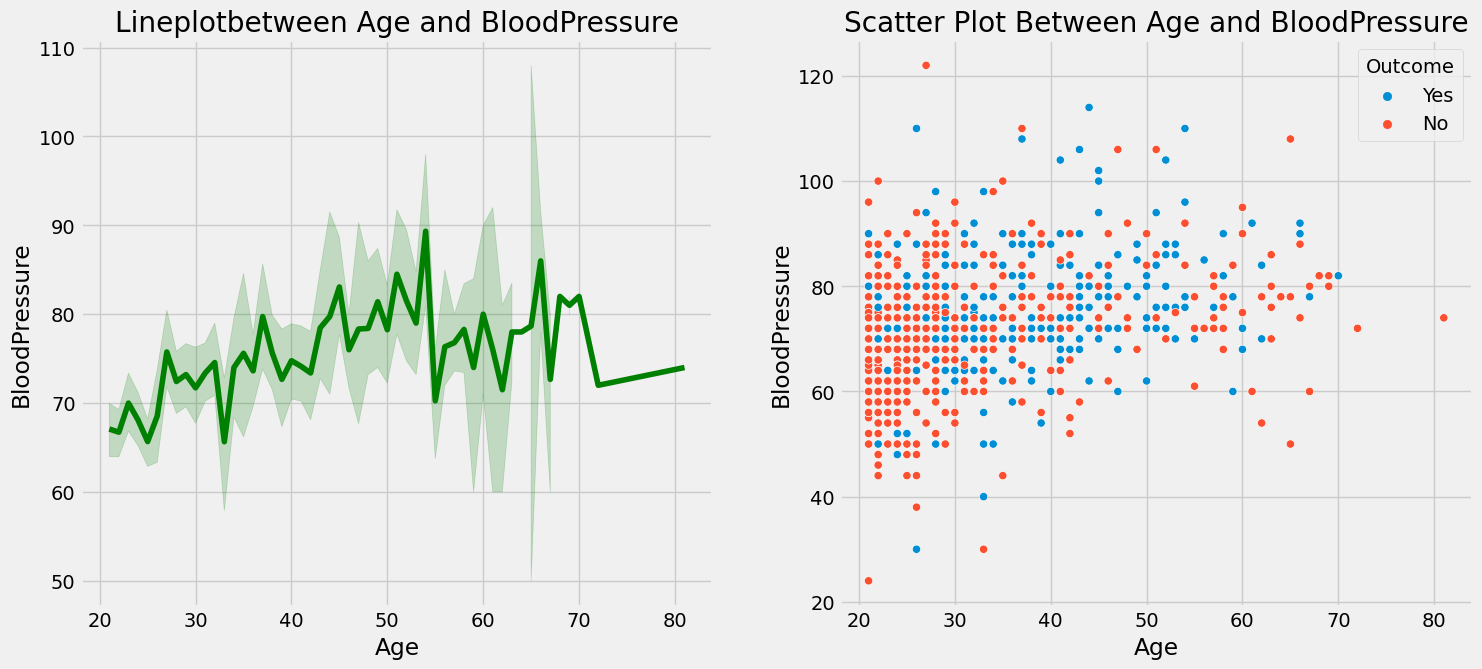

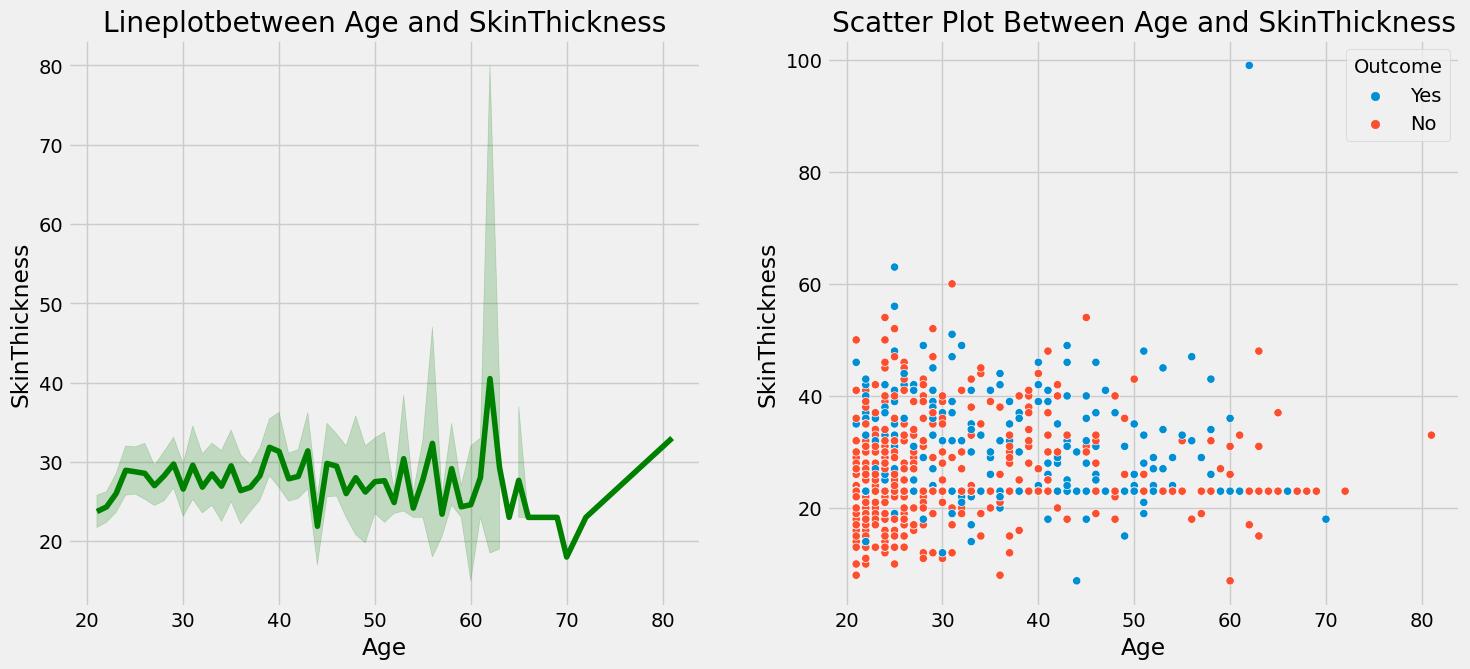

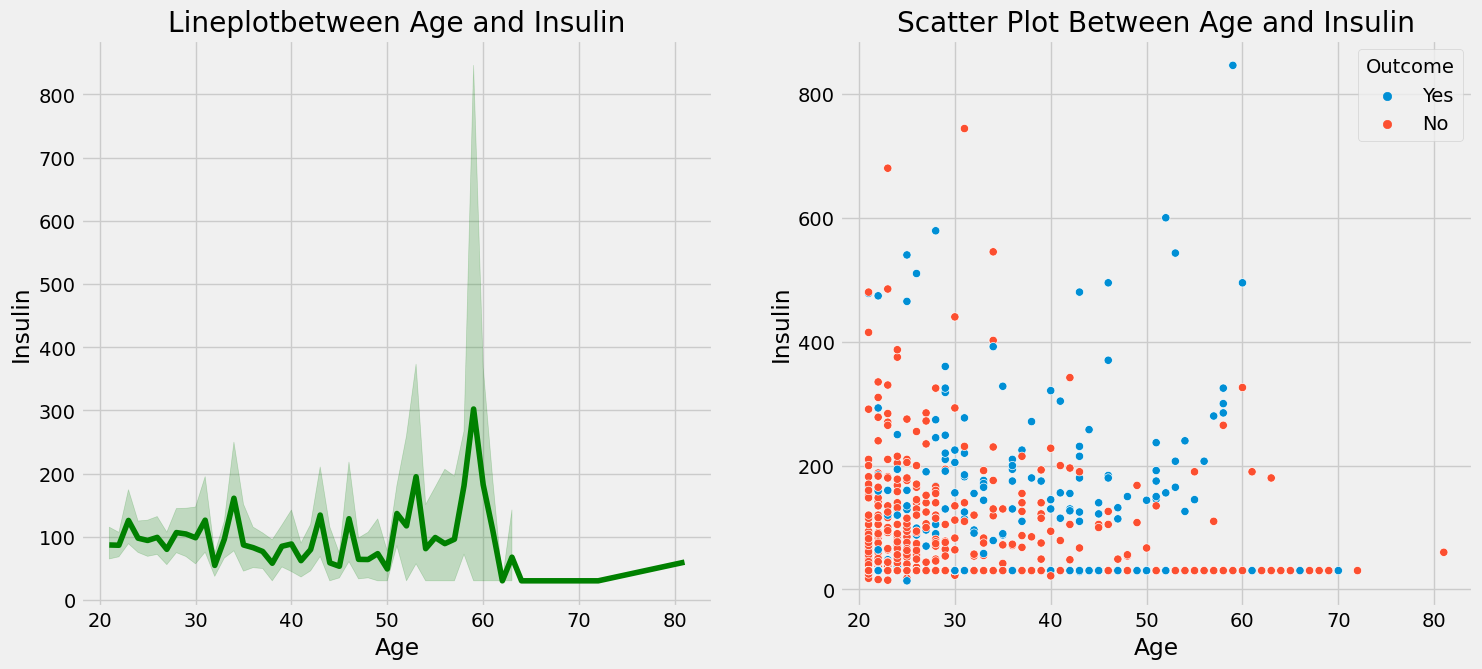

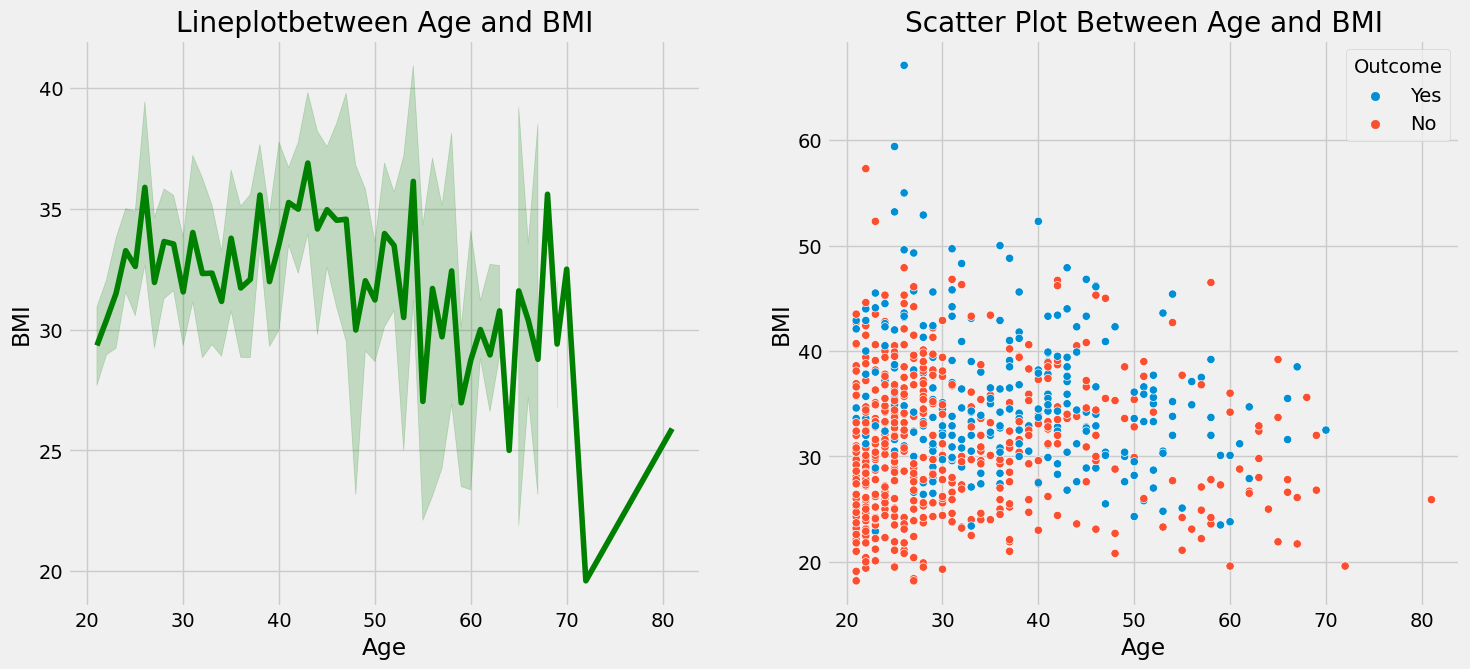

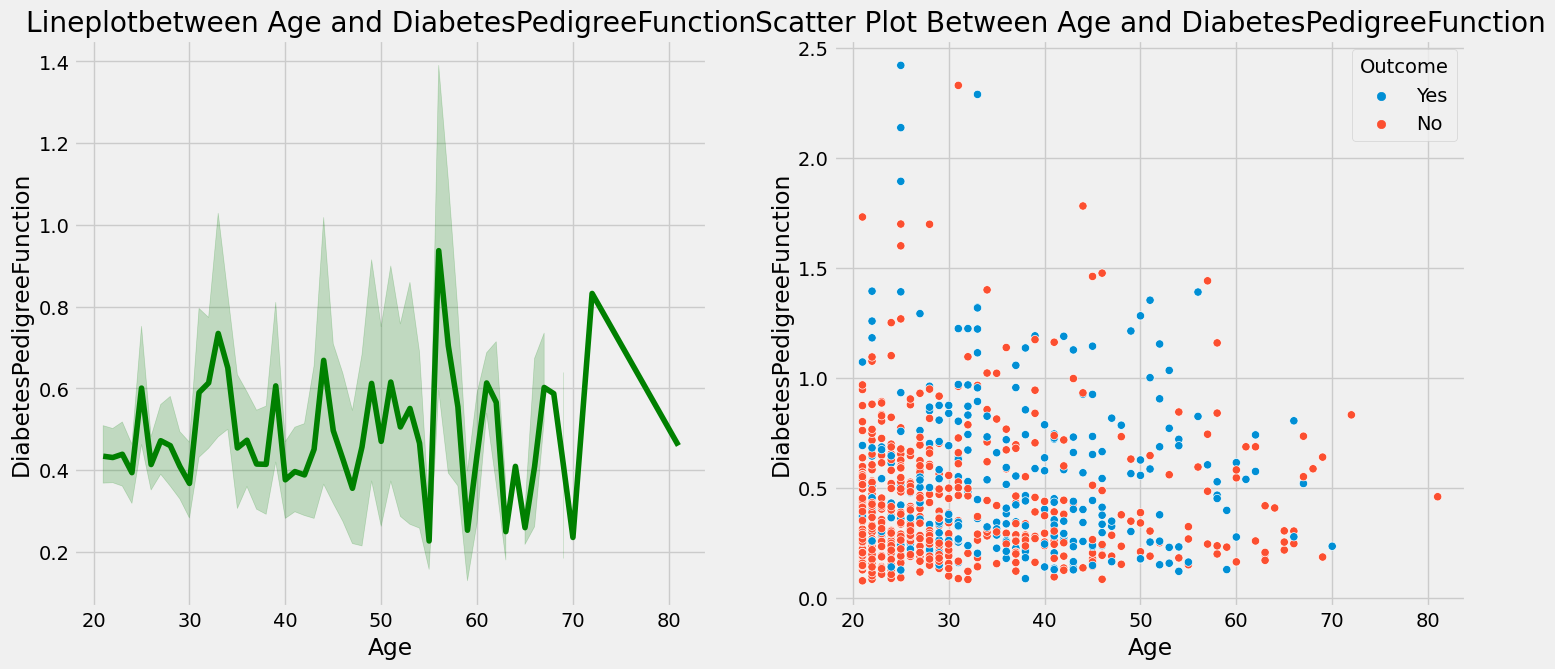

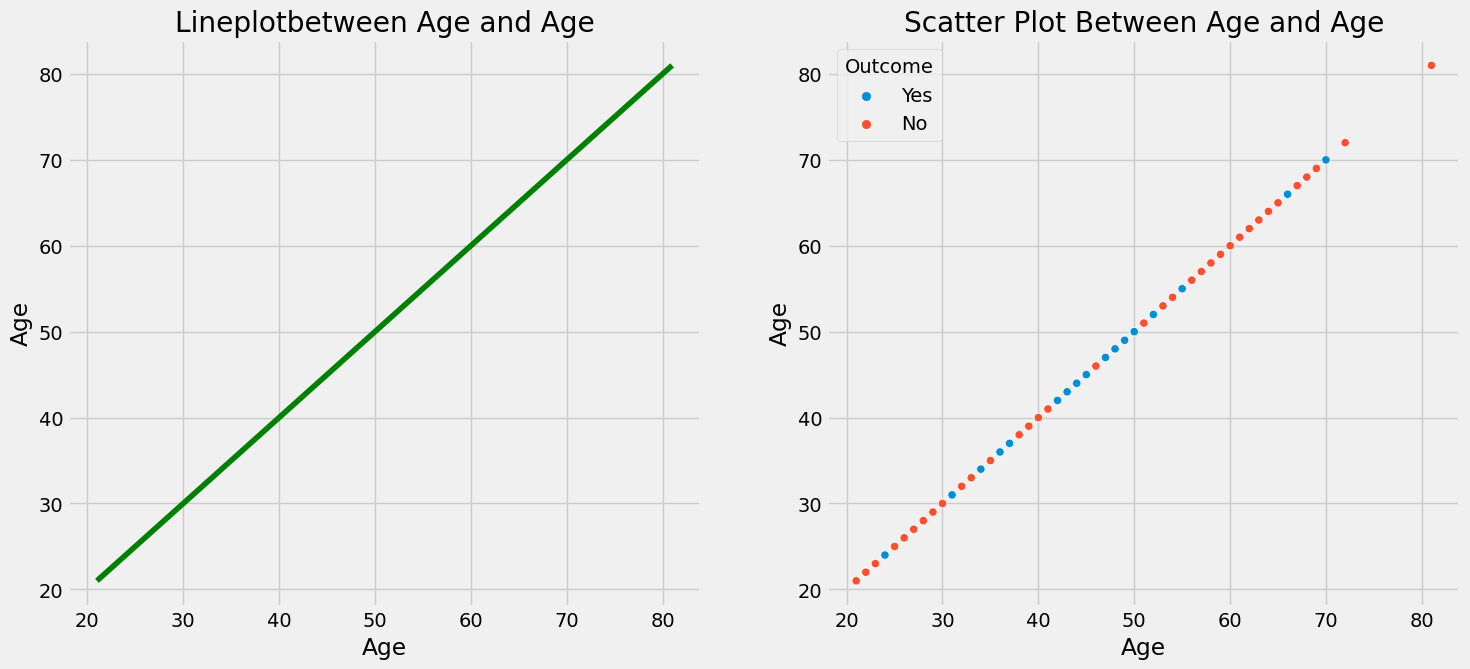

In [25]:
for col in data.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=data, feature1="Age", feature2=col)
    
    

In [26]:
# create acorrelation matrix
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   

                               Age  
Pregnancies               0.544341  
Glucose                   0.266909  
BloodPressure             0.324915  
SkinThickness             0.054514  
Insulin                  -0.015413  
BMI                       0.025744  
DiabetesPedigreeFunction  0.033561  
Age                       1.000000

In [27]:
df=data.copy()
d={"Yes":1, "No":0}
df["Outcome"]=df["Outcome"].map(d)

In [28]:
df[df.columns[:]].corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

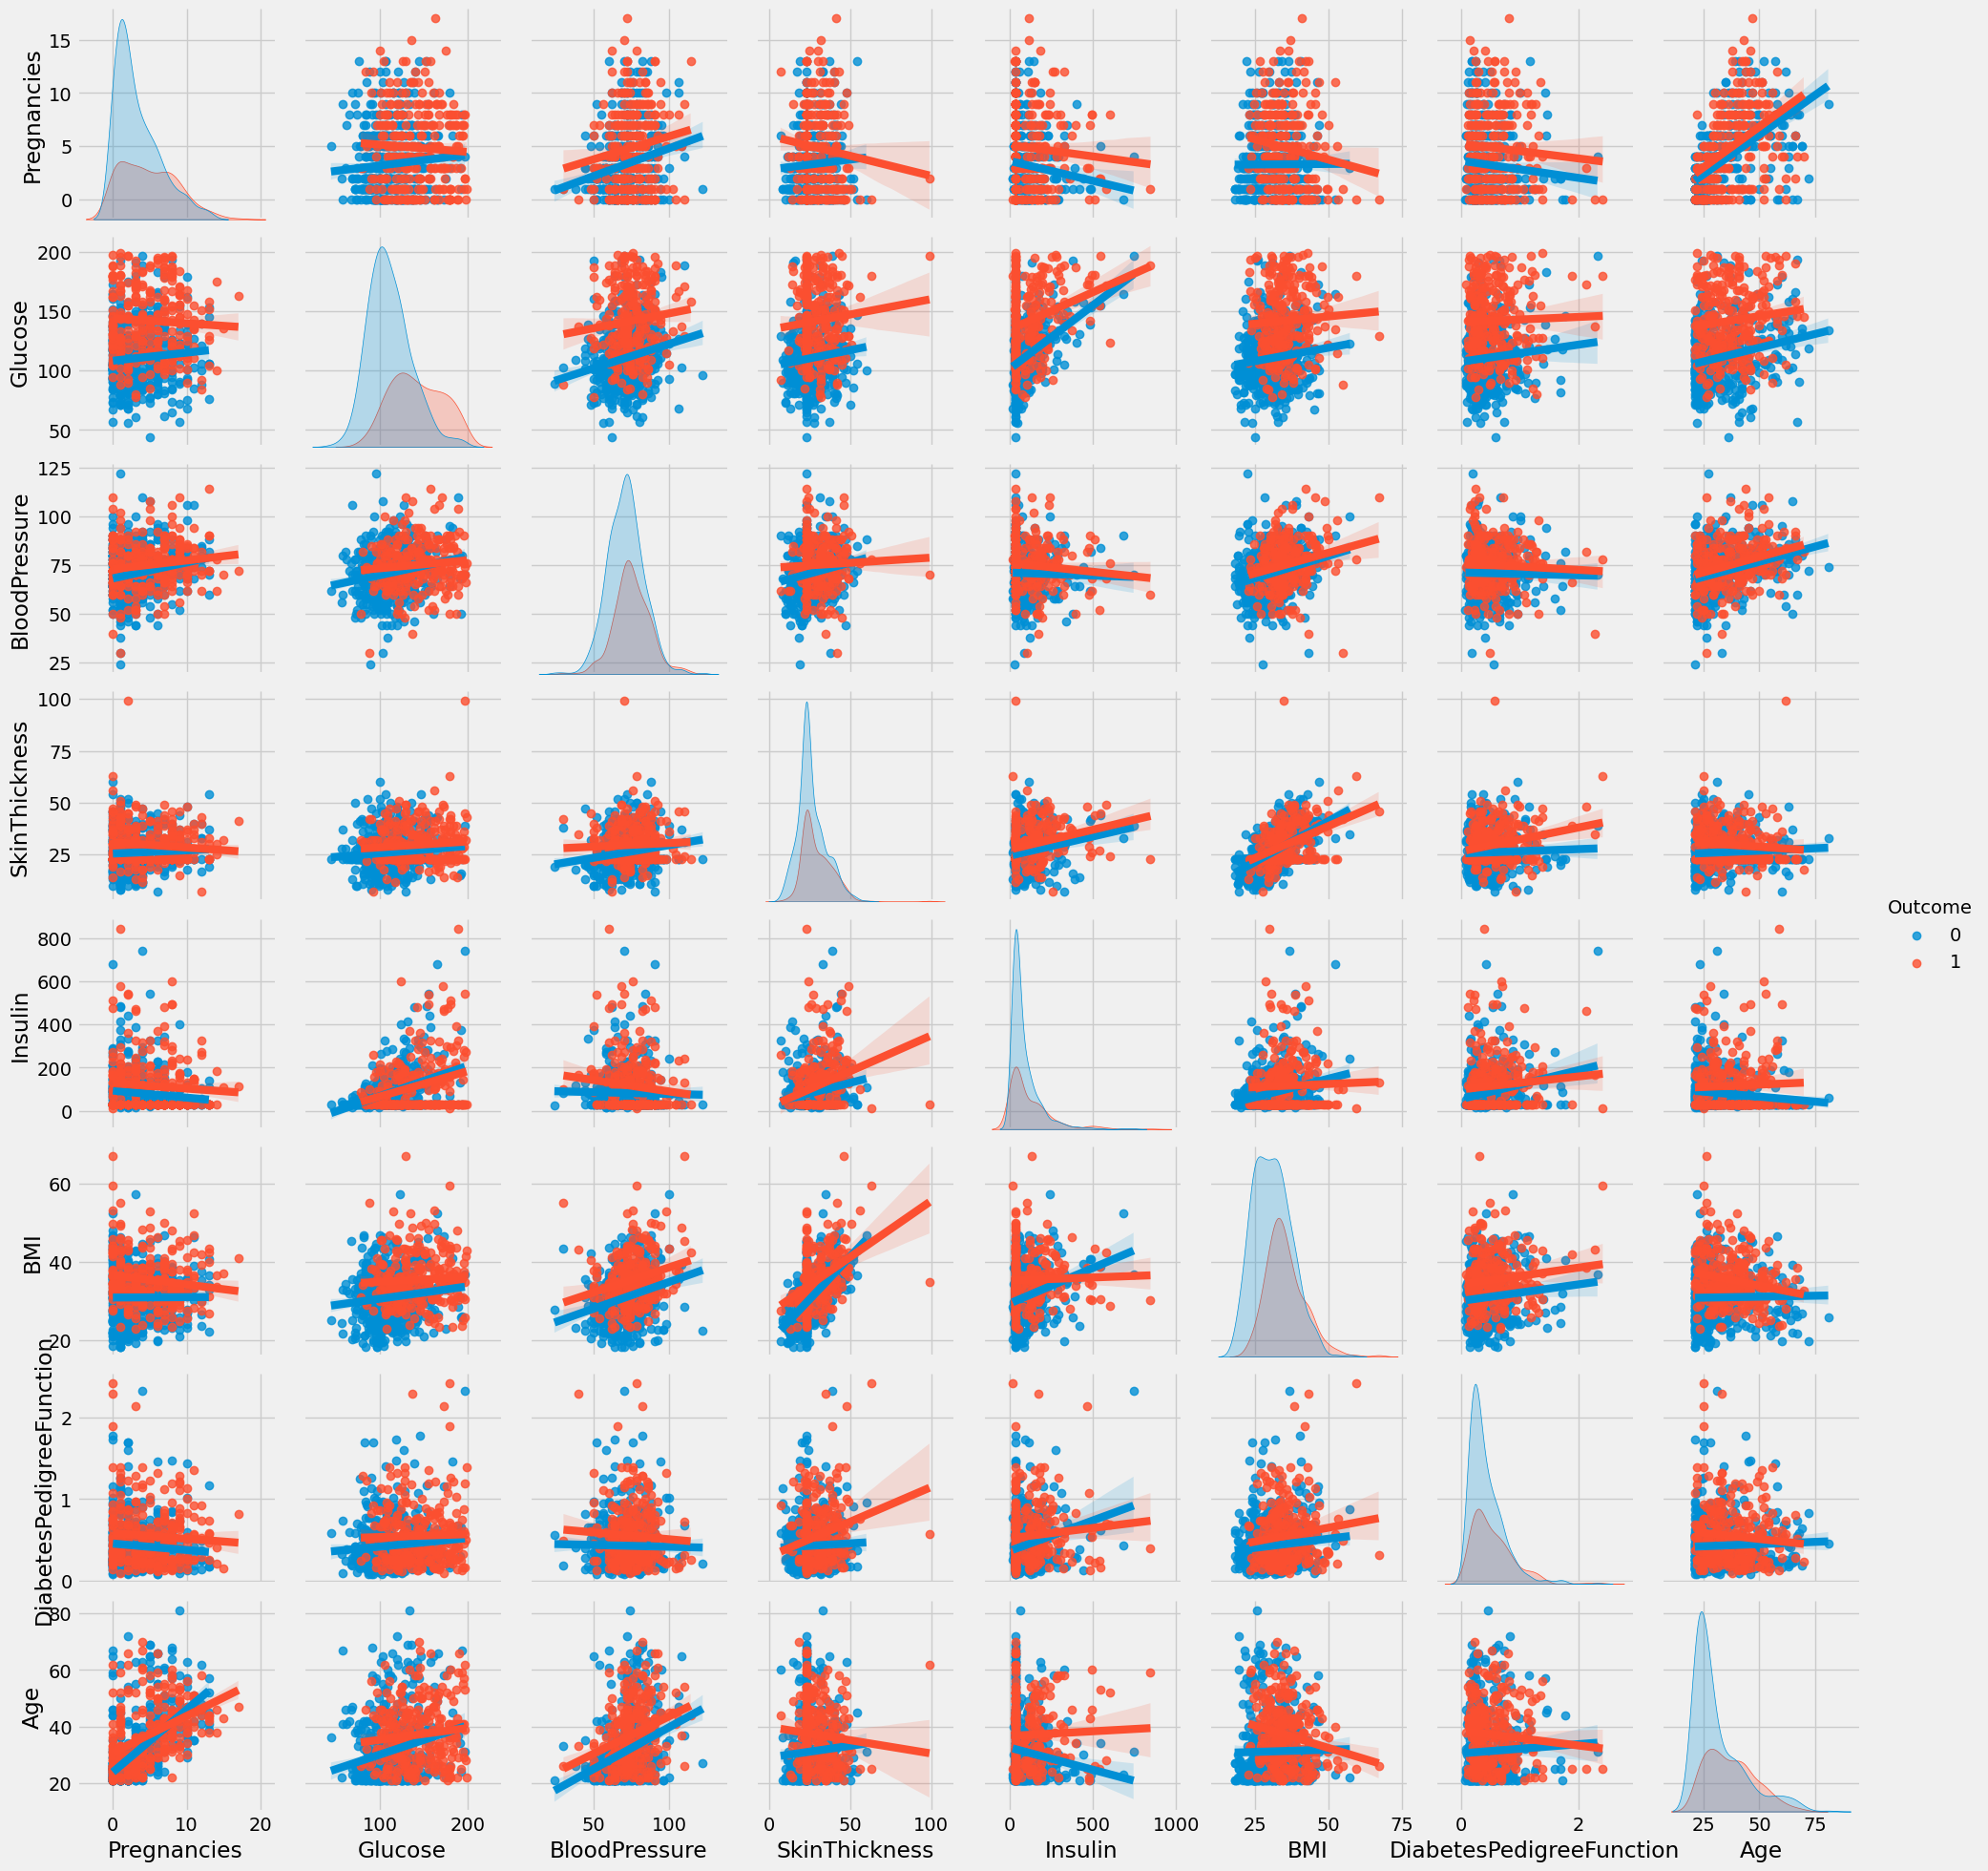

In [29]:
sns.pairplot(df, hue="Outcome", kind='reg')

<AxesSubplot: >

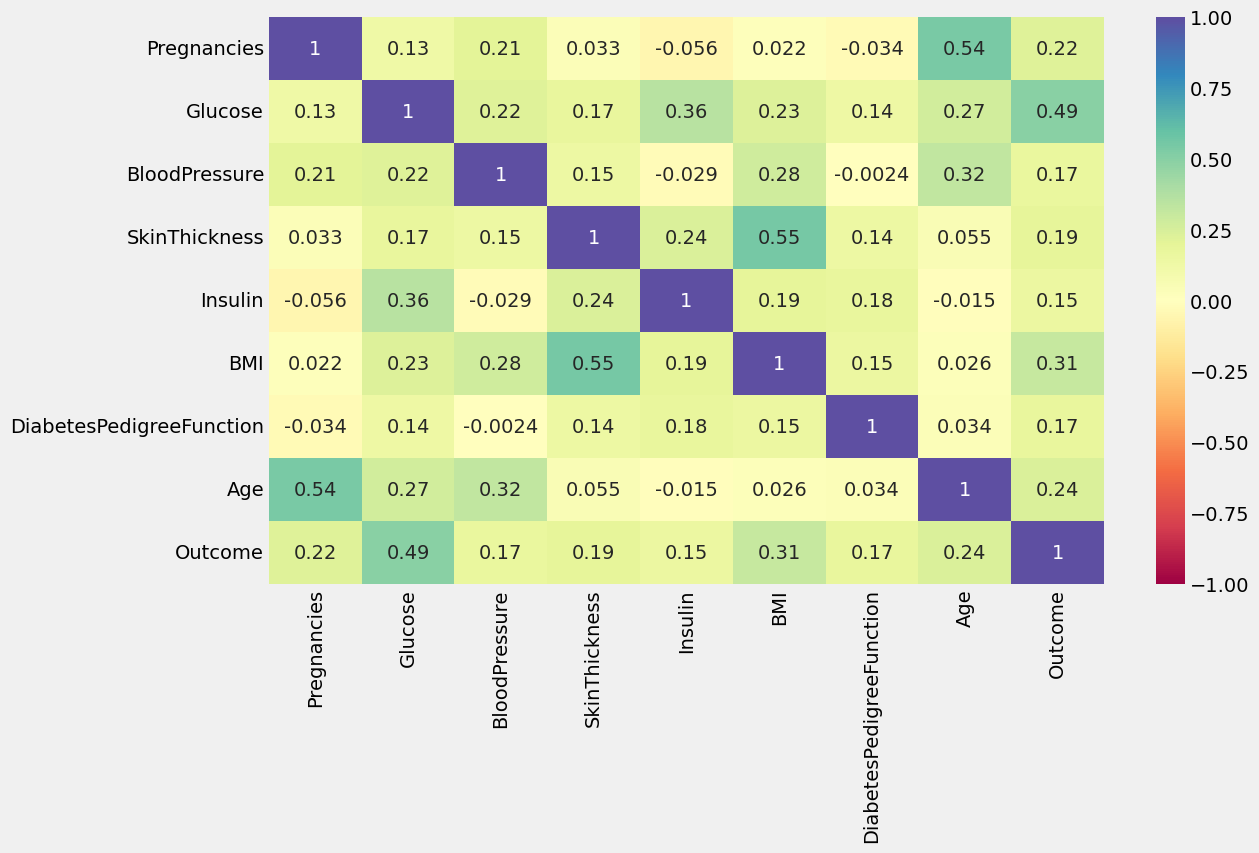

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=+1)

From the above graphs we can see that Glucose, Age and BMI are the strongest predictors of Diabetes

# To be continued..

In [31]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [32]:
X = df.drop(columns=['Outcome'])
y=df.Outcome

In [33]:
sm = SMOTE()

In [34]:
X,y = sm.fit_resample(X,y)

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
sc = StandardScaler()
xtrain = sc.fit_transform(pd.DataFrame(xtrain))
xtest = sc.transform(pd.DataFrame(xtest))

In [37]:
def metrics(y_test, y_pred, model_name):
    print('The metrics for the model', model_name)
    print('')
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('')
    print('Recall score:', recall_score(y_test, y_pred))
    print('')
    print('Precision score:', precision_score(y_test, y_pred))
    print('')
    print('F1 score:',f1_score(y_test, y_pred))
    print('')
    print('ROC score:', roc_auc_score(y_test, y_pred))
    print('Classification Report')
    print(classification_report(y_test,y_pred))

In [38]:
def plot_metrics(clf,X_test,y_test):
    plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1])
    plot_roc_curve(clf, X_test, y_test)
    plot_precision_recall_curve(clf,X_test,y_test)

In [39]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
metrics(ytest,ypred,knn)

The metrics for the model KNeighborsClassifier()

Accuracy score: 0.7466666666666667

Recall score: 0.8278145695364238

Precision score: 0.7142857142857143

F1 score: 0.7668711656441718

ROC score: 0.7461220498688831
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       149
           1       0.71      0.83      0.77       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.74       300
weighted avg       0.75      0.75      0.74       300



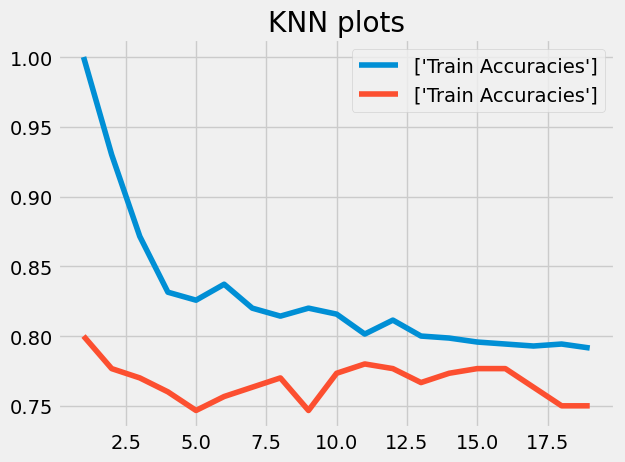

In [40]:
neighbours = np.arange(1,20)
train = np.empty(len(neighbours))
test = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn= KNeighborsClassifier(k)
    knn.fit(xtrain,ytrain)
    train[i]=knn.score(xtrain,ytrain)
    test[i]=knn.score(xtest,ytest)

plt.title('KNN plots')
plt.plot(neighbours,train,label=['Train Accuracies'])
plt.plot(neighbours,test,label=['Train Accuracies'])
plt.legend()

In [41]:
metrics(ytest,ypred,rf)

NameError: name 'rf' is not defined

In [44]:
clfs={
    'Logreg': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'XgBoost': XGBClassifier()
}





In [ ]:
models_report = pd.DataFrame(columns=['model', 'accuracy','recall','precision','roc auc','f1 score'])

In [ ]:
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print('Fitting the model...', clf_name)
    t={'model': clf_name,
       'accuracy': accuracy_score(ytest, ypred),
       'recall': recall_score(ytest, ypred),
       'precision': precision_score(ytest, ypred),
       'roc auc': roc_auc_score(ytest, ypred),
       'f1 score': f1_score(ytest, ypred)
    }
    models_report=models_report.append(t, ignore_index=True)
    
models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report

In [ ]:
rf= RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [ ]:
#params = {'n_estimators':[100,200,300],'min_samples_leaf':range(1,5,1),'min_samples_split':range(2,10,2),'max_features':['sqrt','log2'],
#         'criterion':['gini','entropy'],'max_depth':[2,4,None]}


gs = GridSearchCV
model = gs(estimator=rf,param_grid=params,cv=5,scoring='f1')
features = model.fit(xtrain,ytrain)

In [ ]:
#features.best_params_

In [ ]:
rf_tuned= RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=4,n_estimators=300)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
value = shap.TreeExplainer(rf).shap_values(xtest)
shap.summary_plot(value,xtrain,plot_type='bar',feature_names=df.columns)


In [ ]:
from sklearn.pipeline import Pipeline

In [47]:
def preprocess(df):
    X = df.drop('Outcome', axis=1)
    y=df.Outcome
    sm=SMOTE()
    X,y = sm.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
    return X_train,X_test,y_train,y_test

In [45]:
rf_tuned= RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=4,n_estimators=300)

In [48]:
steps = [('scaler',sc),('rf_tuned')]
from sklearn.pipeline import Pipeline
steps=[('scaler',sc),('rf_tuned',rf_tuned)]
xtrain, xtest, ytrain, ytest = preprocess(df)
pipeline=Pipeline(steps)
pipeline.fit(xtrain, ytrain)
y_pred= pipeline.predict(xtest)
metrics(ytest, y_pred,'Pipeline')

The metrics for the model Pipeline

Accuracy score: 0.79

Recall score: 0.84

Precision score: 0.7636363636363637

F1 score: 0.8000000000000002

ROC score: 0.7899999999999999
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       150
           1       0.76      0.84      0.80       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [49]:
import pickle
model = open('rfc.pickle','wb')
pickle.dump(pipeline,model)
model.close()

In [71]:
%%writefile model.py
import streamlit as st
import pandas as pd
st.title('Medical Diagnostic Web Application 🏥')
import pickle 

# Step 1: load the pickled model
model = open('rfc.pickle','rb')
rf=pickle.load(model)
model.close()

# Step 2: create a UI for front end user
from PIL import Image
image_dia = Image.open('diabetes.jpg')
image_dia1 = Image.open('nosweet.jpg')
image_nodia = Image.open('eatsweet.jpg')
pregs = st.sidebar.slider('Pregnancies',0,20,step=1)
glucose=st.sidebar.slider('Glucose',40,200,40)
bp=st.sidebar.slider('BloodPressure',5,100,5)
skin=st.sidebar.slider('SkinThickness',5,100,5)
insulin=st.sidebar.slider('Insulin',10,900,10)
bmi= st.sidebar.slider('BMI',15,70,15)
dpf=st.sidebar.slider('DiabetesPedigreeFunction',0.5,3.0,0.5)
age=st.sidebar.slider('Age',21,90,21)

# Step 3: Change user input as models input data
data={
    'Pregnancies':pregs,
    'Gluscose':glucose,
    'BloodPressure':bp,
    'SkinThickness':skin,
    'Insulin':insulin,
    'BMI':bmi,
    'DiabetesPedigreeFunction':dpf,
    'Age':age

}
input_data = pd.DataFrame([data])
predictions = rf.predict(input_data)[0]
if st.sidebar.button('Predict'):
    if predictions==0:
        st.success('You are Diabetes free , Congratulations 🏅')
        st.image(image_nodia)
    if predictions==1:
        st.error('Having Diabetes , Please Eat less sugar')
        st.image(image_dia)
        st.image(image_dia1)

Overwriting model.py
